In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

In [36]:
green=pd.read_csv("green_trips_new_2.csv")

In [6]:
green.isnull().sum()

pickup_datetime      0
dropoff_datetime     0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
total_amount         0
dtype: int64

In [7]:
green.head(1)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8


In [8]:
round(green.describe(),2)
# Tarifas negativas? tarifas por encima de 50.000 US?

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
count,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00
mean,-73.81,40.69,-73.83,40.69,1.40,2.95,14.78
std,2.98,1.64,2.81,1.55,1.09,2.98,29.78
min,-122.40,0.00,-122.40,0.00,0.00,0.00,-350.00
25%,-73.96,40.70,-73.97,40.71,1.00,1.10,7.80
50%,-73.94,40.75,-73.94,40.75,1.00,1.99,11.30
75%,-73.92,40.80,-73.91,40.80,1.00,3.78,18.00
max,0.00,42.79,0.00,43.16,9.00,439.53,51192.00


In [9]:
green.shape

(3589048, 9)

In [10]:
green.iloc[99]

pickup_datetime      2014-09-05 02:33:02
dropoff_datetime     2014-09-06 02:11:02
pickup_longitude                -73.9372
pickup_latitude                  40.8046
dropoff_longitude               -73.9512
dropoff_latitude                 40.8144
passenger_count                        1
trip_distance                       1.84
total_amount                         9.5
Name: 99, dtype: object

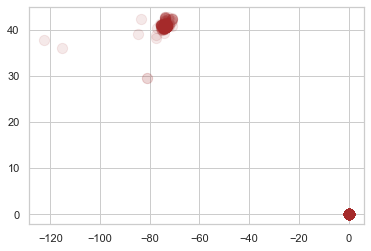

In [11]:
import pylab as pl
import numpy as np
pl.scatter(green['pickup_longitude'], green['pickup_latitude'], color="brown", s=105, alpha=.1)

In [12]:
nuevo1=green[green["passenger_count"]==2]

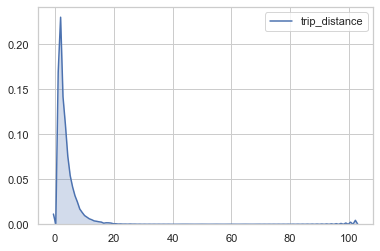

In [13]:
sns.kdeplot(nuevo1.trip_distance,shade=True)

In [14]:
nuevo3=green[(green["passenger_count"]==1) & (green["total_amount"]<40)  & (green["total_amount"]>0)]
nuevo4=green[(green["passenger_count"]>1) & (green["total_amount"]<40)  & (green["total_amount"]>0)]

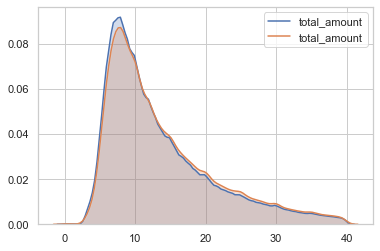

In [15]:
sns.kdeplot(nuevo3.total_amount,shade=True)
sns.kdeplot(nuevo4.total_amount,shade=True)

In [37]:
green['YYYY'] = pd.DatetimeIndex(green['pickup_datetime']).year
green['M'] = pd.DatetimeIndex(green['pickup_datetime']).month
green['D'] = pd.DatetimeIndex(green['pickup_datetime']).day
green["YYYYMM"]=green.YYYY.astype(str) + green.M.astype(str)
green["YYYYMD"]=green.YYYY.astype(str) + green.M.astype(str)+ green.D.astype(str)

In [22]:
print(green.columns)

Index(['pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'total_amount', 'YYYY', 'M', 'D',
       'YYYYMM'],
      dtype='object')


In [18]:
green.head(3)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,YYYY,M,D,YYYYMM
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,2015,2,1,20152
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,2015,1,2,20151
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,2014,9,27,20149


In [19]:
round(green.describe(),2)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,YYYY,M,D
count,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00,3589048.00
mean,-73.81,40.69,-73.83,40.69,1.40,2.95,14.78,2014.55,4.88,15.66
std,2.98,1.64,2.81,1.55,1.09,2.98,29.78,0.50,2.24,8.77
min,-122.40,0.00,-122.40,0.00,0.00,0.00,-350.00,2014.00,1.00,1.00
25%,-73.96,40.70,-73.97,40.71,1.00,1.10,7.80,2014.00,3.00,8.00
50%,-73.94,40.75,-73.94,40.75,1.00,1.99,11.30,2015.00,5.00,16.00
75%,-73.92,40.80,-73.91,40.80,1.00,3.78,18.00,2015.00,6.00,23.00
max,0.00,42.79,0.00,43.16,9.00,439.53,51192.00,2015.00,9.00,31.00


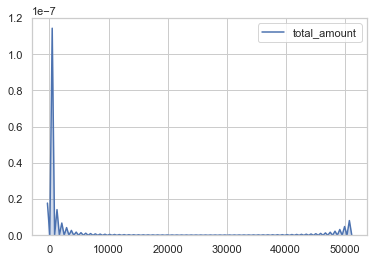

In [20]:
sns.kdeplot(green.total_amount,shade=True)

In [21]:
green.total_amount.quantile(.99)

54.36

In [38]:
green_clean=green[(green["total_amount"]>0) & (green["total_amount"]<=green.total_amount.quantile(.99))]

In [6]:
green_clean.shape

(3538637, 9)

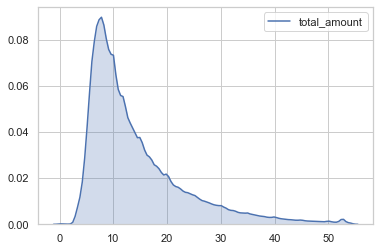

In [24]:
sns.kdeplot(green_clean.total_amount,shade=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

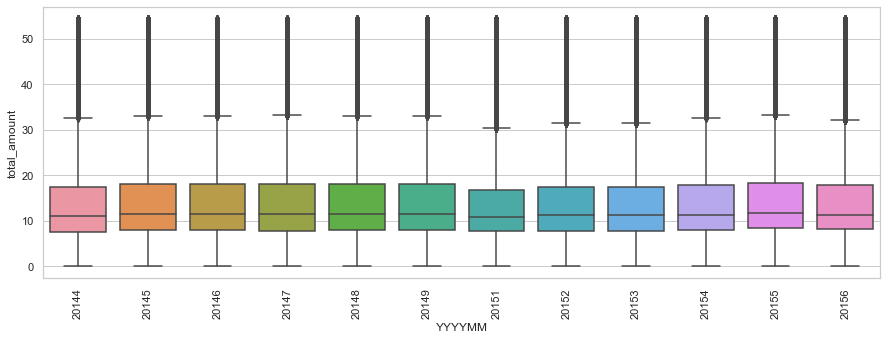

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(y="total_amount", x="YYYYMM", data=green_clean)
plt.xticks(rotation=90)

In [28]:
l1=green_clean.total_amount.quantile(.333)
l1

8.8

In [29]:
l2=green_clean.total_amount.quantile(.666)
l2

15.0

In [30]:
# Discretizar la variable tarifa
def tarifa_categorica(row):
    row_total_amount = row['total_amount']    # the Symbol value in the row
       
       # The function decision: low, medium
    if row_total_amount > l2:
        return '3_HIGH'
    elif row_total_amount < l1:
        return '1_LOW'
    else:
        return '2_MEDIUM'

In [61]:
green_clean['fareC'] = green_clean.apply(lambda row: tarifa_categorica(row), axis=1)
#green_clean.tail(5)

C:\Users\leago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
pd.value_counts(green_clean["fareC"])

2_MEDIUM    1253438
3_HIGH      1158553
1_LOW       1126646
Name: fareC, dtype: int64

In [30]:
nuevo1=green_clean[(green_clean["fareC"]=="1_LOW") & (green_clean["trip_distance"]<12.19)]
nuevo2=green_clean[(green_clean["fareC"]=="2_MEDIUM")& (green_clean["trip_distance"]<12.19)]
nuevo3=green_clean[(green_clean["fareC"]=="3_HIGH")& (green_clean["trip_distance"]<12.19)]

In [31]:
green_clean.trip_distance.quantile(.99)

12.19

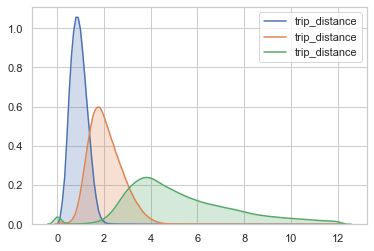

In [32]:
sns.kdeplot(nuevo1.trip_distance,shade=True)
sns.kdeplot(nuevo2.trip_distance,shade=True)
sns.kdeplot(nuevo3.trip_distance,shade=True)


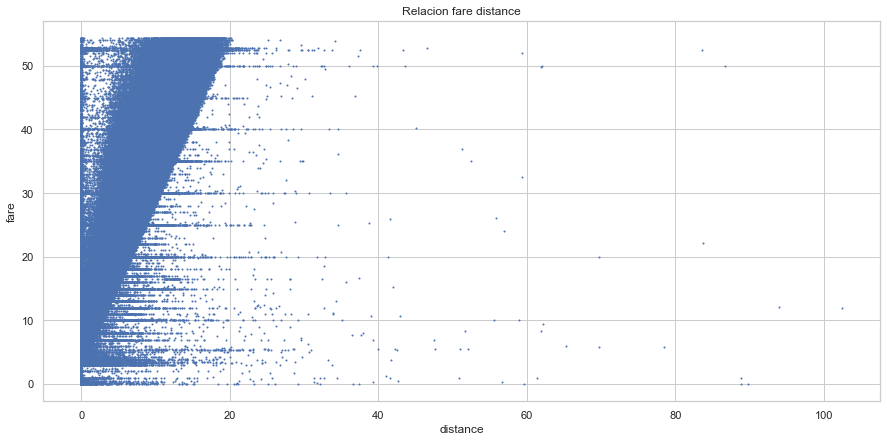

In [33]:
# Create basic scatter plot to view two-variable relationship
plt.figure(figsize=(15, 7))
plt.scatter(green_clean["trip_distance"], green_clean["total_amount"], s=1)
plt.title("Relacion fare distance");
plt.xlabel("distance");
plt.ylabel("fare");

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

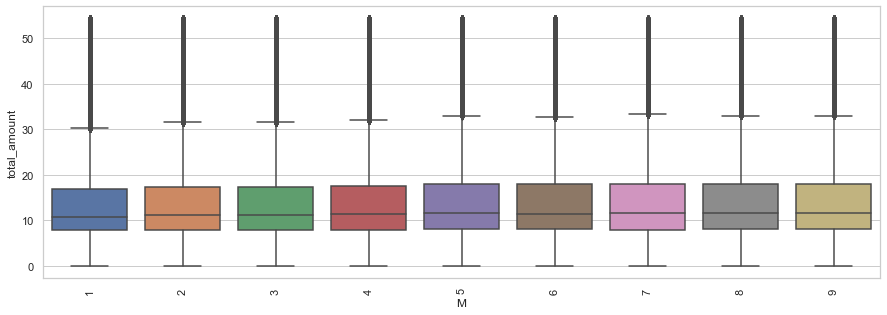

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(y="total_amount", x="M", data=green_clean)
plt.xticks(rotation=90)

In [45]:
green_clean.head(2)

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,YYYY,M,D,YYYYMM,fareC,dJFK,dCP,dLGA
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,2015,2,1,20152,3_HIGH,,,
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,2015,1,2,20151,2_MEDIUM,,,


In [48]:
len(green_clean.pickup_longitude)

3538637

In [18]:
green_clean.shape

(3538637, 13)

In [57]:
(green_clean["pickup_longitude"][2001]+73.87396590000002)**2+(green_clean["pickup_latitude"][2001]+40.7769271)**2

6656.276113330987

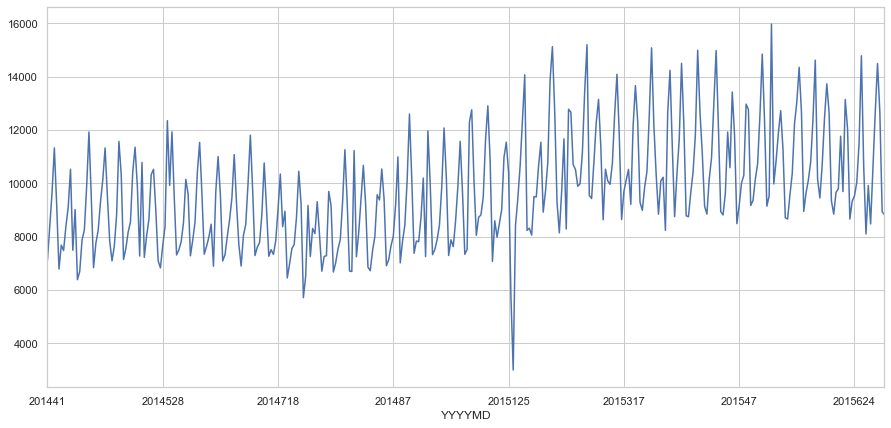

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
green_clean.groupby('YYYYMD')["pickup_datetime"].count().plot(ax=ax)


In [54]:
greenNP=green_clean.groupby(["YYYYMD","YYYY","M","D"])["pickup_datetime"].count()

In [56]:
greenNP.to_csv("greenNP.csv",  header=True)